# NGO Clustering Assignment

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the scaling library
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
# Reading the dataset 
CNT=pd.read_csv("Country-data.csv")
CNT.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Understanding the data

In [3]:
CNT.shape

(167, 10)

In [4]:
# Check the datatype of the columns
CNT.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Column - 'country' is only object type(caztegorical value)**

### Checking Missing Value

In [5]:
# Cheecking for missing values
CNT.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# Cheking the % of the missing/values in the NGO dataset
round(100*CNT.isnull().sum()/len(CNT.index),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

**No missing values**

### Column 'health', 'imports' and 'exports' are in percentage form as per data dictionary
**Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country.**

In [7]:
# Now changing per Total GDP to per Total GDPP
CNT['health']=(CNT['health']*CNT['gdpp'])/100
CNT['imports']=(CNT['imports']*CNT['gdpp'])/100
CNT['exports']=(CNT['exports']*CNT['gdpp'])/100
CNT.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Data Visualisation

### univariate analysis

In [8]:
CNT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


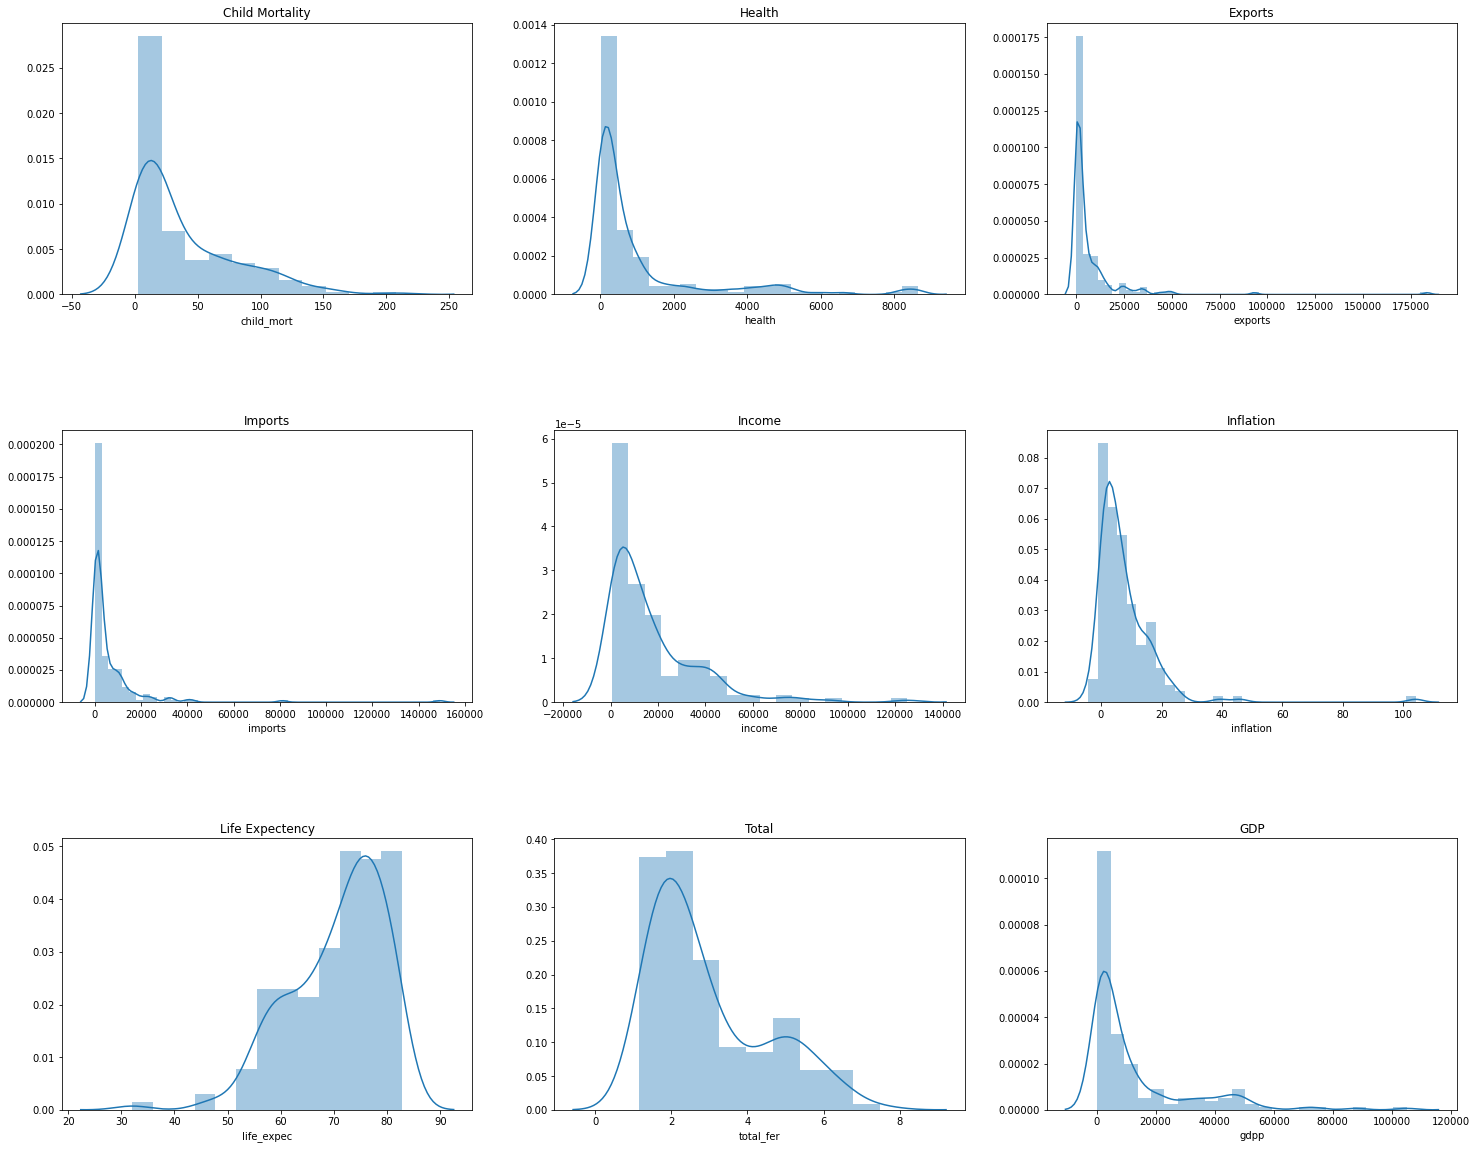

In [9]:
# All Columns are Continuos in property
plt.figure(figsize = (25,20))
plt.subplots_adjust(hspace = 0.5) #creating space between subplots

plt.subplot(3,3,1)
sns.distplot(CNT.child_mort)
plt.title('Child Mortality')

plt.subplot(3,3,2)
sns.distplot(CNT.health, bins=20)
plt.title('Health')

plt.subplot(3,3,3)
sns.distplot(CNT.exports)
plt.title('Exports')

plt.subplot(3,3,4)
sns.distplot(CNT.imports)
plt.title('Imports')

plt.subplot(3,3,5)
sns.distplot(CNT.income)
plt.title('Income')

plt.subplot(3,3,6)
sns.distplot(CNT.inflation)
plt.title('Inflation')

plt.subplot(3,3,7)
sns.distplot(CNT.life_expec)
plt.title('Life Expectency')

plt.subplot(3,3,8)
sns.distplot(CNT.total_fer)
plt.title('Total')

plt.subplot(3,3,9)
sns.distplot(CNT.gdpp)
plt.title('GDP')

plt.show()

#### Inference:
    life_expec are right skewed and all other features are leftskewed

### We will have a look on the lowest 10 countries for each factor.

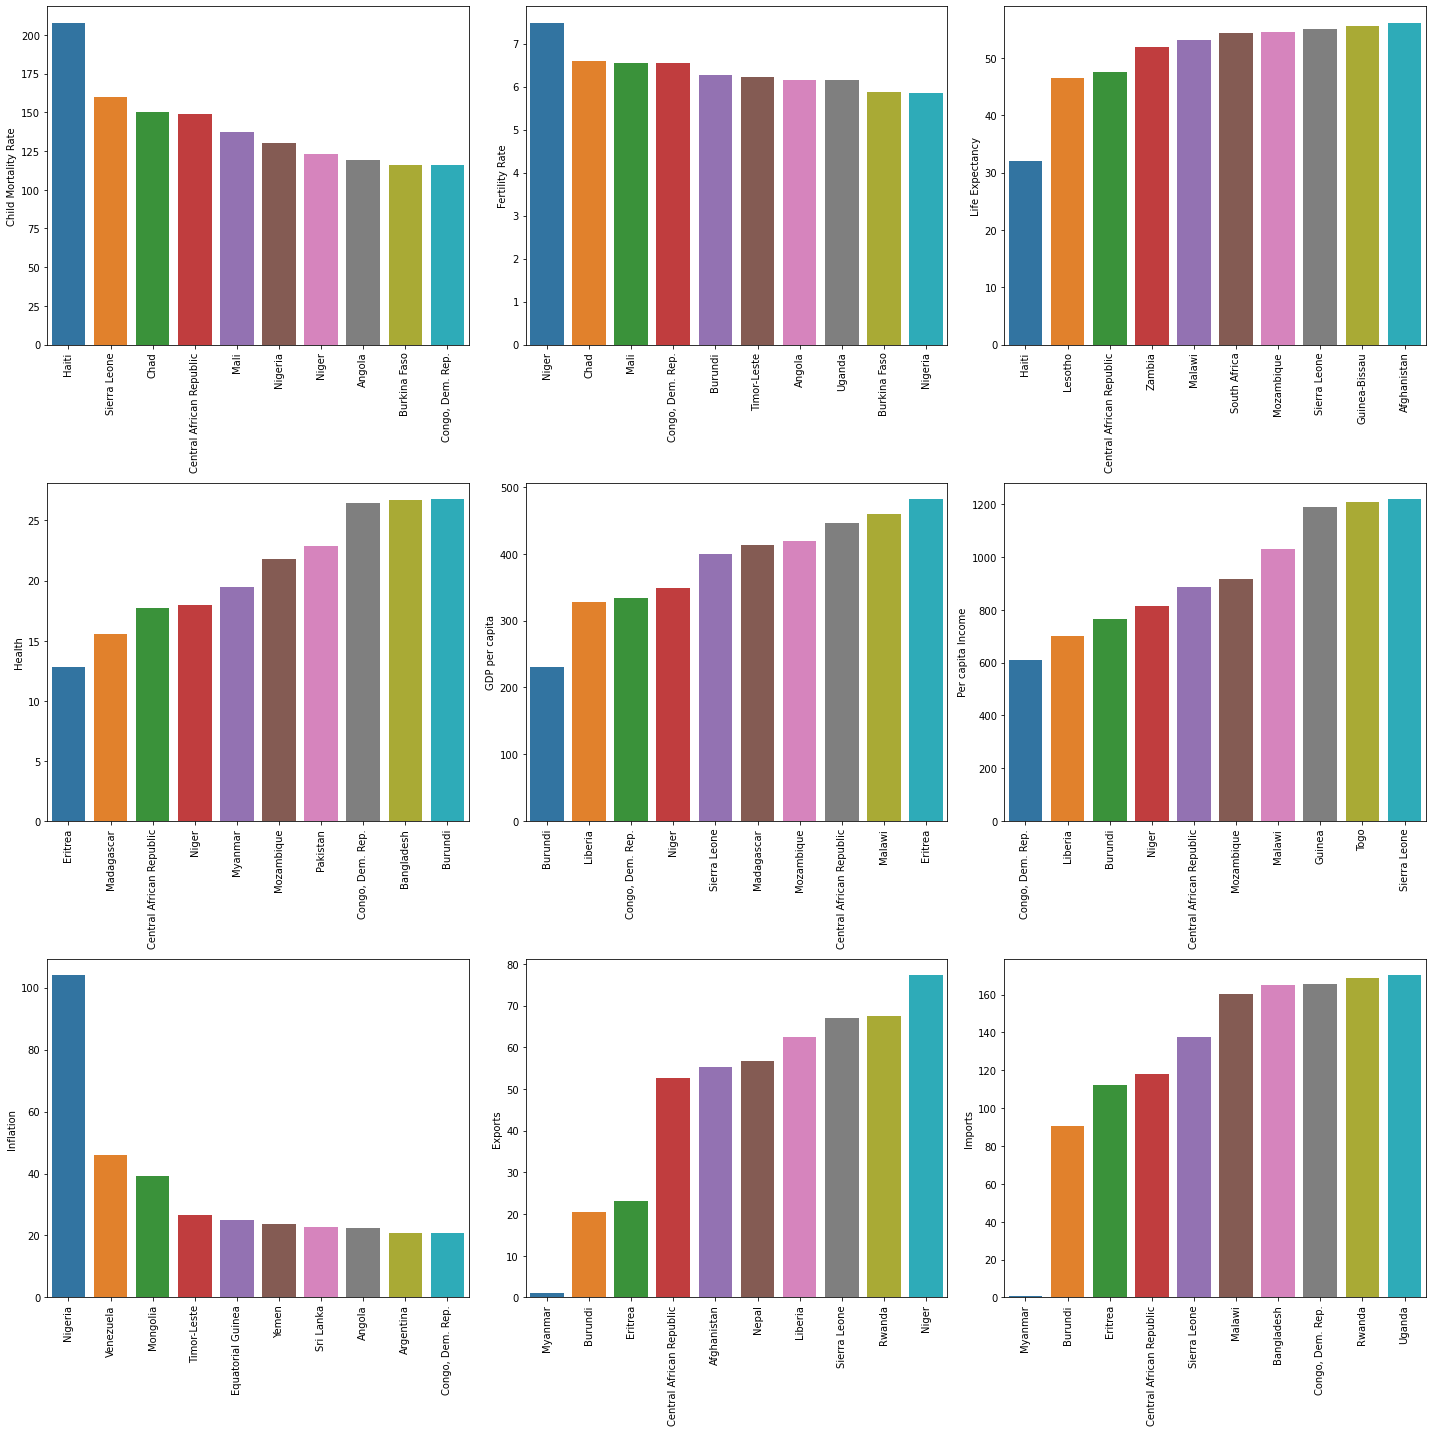

In [10]:
fig, axs = plt.subplots(3,3,figsize = (20,20))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
top10_child_mort = CNT[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = CNT[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
bottom10_life_expec = CNT[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.
bottom10_health = CNT[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.
bottom10_gdpp = CNT[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person
bottom10_income = CNT[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP
top10_inflation = CNT[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP
bottom10_exports = CNT[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP
bottom10_imports = CNT[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()
    

#### Inference
    From above bar plot we could see the common contires in the profile of gdpp, child_mort and income are: Congo, Dem. Rep., Niger, Sierra Leone,Central African Republic

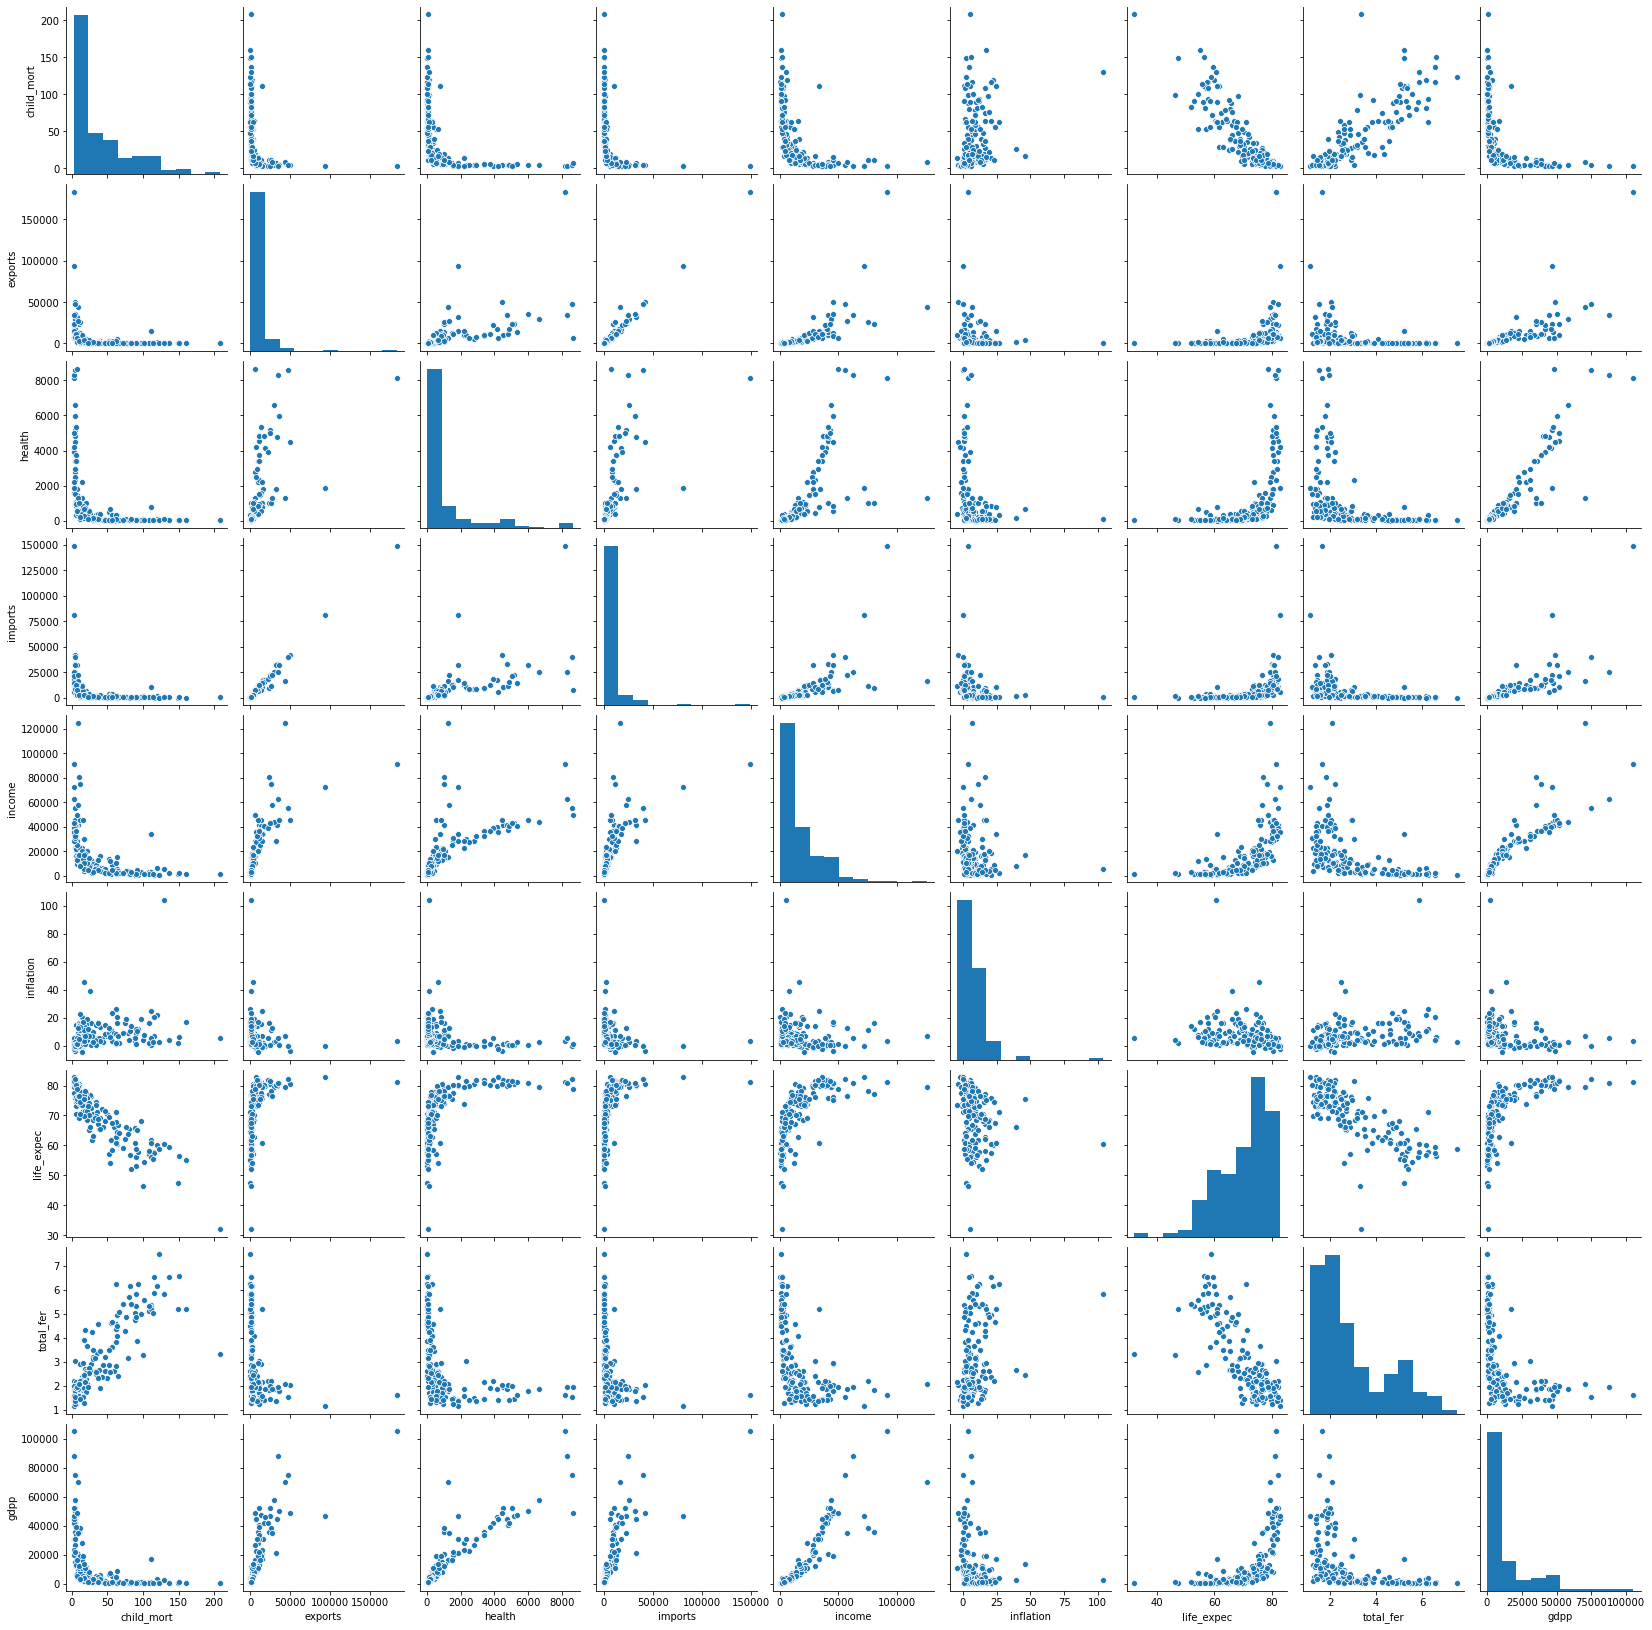

In [11]:
# pairplot for continuous data type
sns.pairplot(CNT.select_dtypes(['int64','float64']))
plt.show()

- #### From the pairplot above we can make out how different variables are correlated to each other

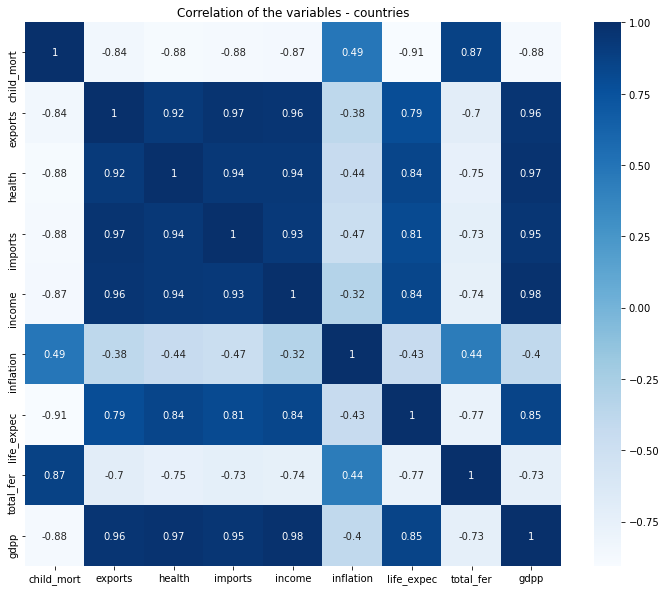

In [12]:
# Plotting heat map to see the correlation of the dataset
plt.figure(figsize=(12,10))

plt.title("Correlation of the variables - countries")
sns.heatmap(CNT.corr(method='spearman'),annot=True, cmap='Blues')   
plt.show()

### Inference

From the above heatmap, we can see that there are some variables having very high correlation with repect to postive and negative.

- <font color=brown>Child mortality is highly correlated with total fertility with the correlation coefficient of 0.87</font>
- <font color=brown>Imports & exports, health & gdpp, income & gdpp are also well correlated</font>
- <font color=brown>Life expectency has strong negative correlation with total fertility of about -0.77</font>
- <font color=brown>Child mortality is also in strong negative correlation with life expectency</font>

## Bivariate Analysis

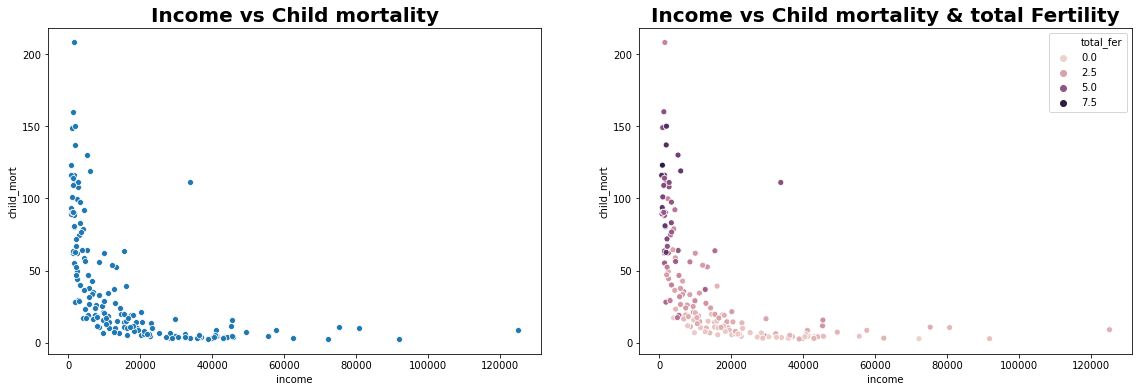

In [13]:
#Income vs Child Mortality
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=CNT)
plt.title('Income vs Child mortality',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=CNT)
plt.title('Income vs Child mortality & total Fertility',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

- #### From the plots above We can see that low income people have high child mortality, which means death of children under age 5 is more, where there is a low income </font>
- #### Where the income is more we can see there is no mortality
- #### In the second plot we can see that, high fertility rate for a woman and low income have high child mortality

## Outlier Analysis
#### child_mort ,gdpp and income are important variables to finalize the financial aid and those are highlited in green color

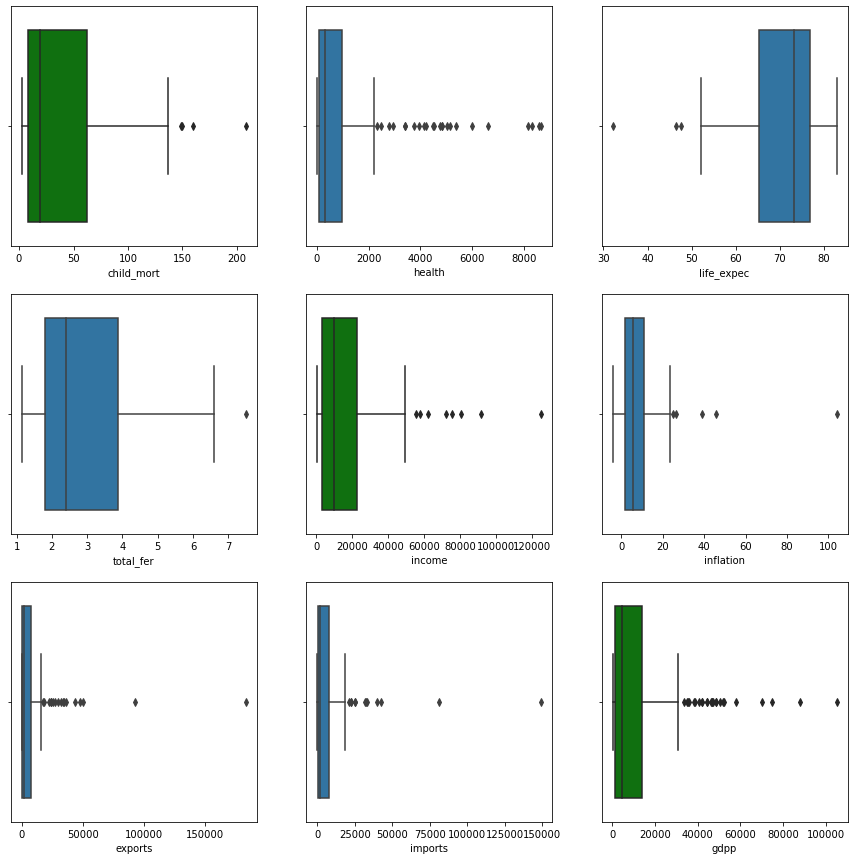

In [14]:
fig, axs = plt.subplots(3,3, figsize = (15,15))
plt1 = sns.boxplot(CNT['child_mort'], ax = axs[0,0], color = 'green')
plt2 = sns.boxplot(CNT['health'], ax = axs[0,1])
plt3 = sns.boxplot(CNT['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(CNT['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(CNT['income'], ax = axs[1,1], color = 'green')
plt6 = sns.boxplot(CNT['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(CNT['exports'], ax = axs[2,0])
plt8 = sns.boxplot(CNT['imports'], ax = axs[2,1])
plt9 = sns.boxplot(CNT['gdpp'], ax = axs[2,2], color = 'green')

plt.show()


#### Inference

    Since we have limited number of countries(167), removing these outliers would shrink the shape of data and the under-developed countries which are in actual dire need may not contribute to the dataset.
    
    we would cap the extreme values in the outliers to 0.01 and 0.99 percentile. By doing this we will be avoiding the risk of cluster overlapping
    
    All variables have outliers on the upper side (higher values) except for life_expec which has outliers on the down side (less values) indicating that usually the life expectancy in most countries is above 50 except for 3 countries

### Outlier Treatment

**child_mort: It has outliers beyond higher boundary but we will not do any imputation as we are concernened about the higher child_mort**

**export, helath, imports, total_fer and gdpp : It has outlier at higher level. We will impute outlier to upper capping (0.99 percentile)**

**life_expec : It has outlers bellow the lower boundary, But we are intersted on these values so we will not impute these values.**

In [15]:
# list cols for upper caping
cols = ['exports', 'health', 'imports', 'total_fer','gdpp']
CNT[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7420.618847,1056.733204,6588.352108,2.947964,12964.155689
std,17973.885795,1801.408906,14710.810418,1.513848,18328.704809
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,64794.260000,8410.330400,55371.390000,6.563600,79088.000000
max,183750.000000,8663.600000,149100.000000,7.490000,105000.000000


In [16]:
# upper caping
cap = 0.99
for col in cols:
    HL = round(CNT[col].quantile(cap),2)
    CNT[col] = CNT[col].apply(lambda x: HL if x>HL else x)

In [17]:
# Descriptive statistics after capping
CNT[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,6538.214776,1054.206617,5873.135222,2.942216,12756.826347
std,11415.308590,1790.845323,9422.700869,1.498235,17430.208938
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,55136.308400,8352.982600,46629.102600,6.553400,76125.920000
max,64794.260000,8410.330000,55371.390000,6.560000,79088.000000


In [18]:
# Selecting the numerical columns and dropping the country
CNT1=CNT.drop('country', axis =1)

## Feature Scaling

In [19]:
# Create a scaling object
scaler = MinMaxScaler()

# fit_transform
CNT_scaled = scaler.fit_transform(CNT1)
CNT_scaled.shape

(167, 9)

In [20]:
CNT_scaled

array([[4.26484907e-01, 8.36863963e-04, 3.46486091e-03, ...,
        4.75345168e-01, 8.63216266e-01, 4.08334073e-03],
       [6.81596884e-02, 1.76580780e-02, 3.03749369e-02, ...,
        8.71794872e-01, 9.24214418e-02, 4.89366829e-02],
       [1.20253165e-01, 2.64157894e-02, 2.06204964e-02, ...,
        8.75739645e-01, 3.21626617e-01, 5.36287203e-02],
       ...,
       [1.00778968e-01, 1.45404661e-02, 9.14352123e-03, ...,
        8.08678501e-01, 1.47874307e-01, 1.36829958e-02],
       [2.61441091e-01, 6.04883201e-03, 6.55394371e-03, ...,
        6.98224852e-01, 6.50646950e-01, 1.36829958e-02],
       [3.91918208e-01, 8.32067595e-03, 8.71363183e-03, ...,
        3.92504931e-01, 7.85582255e-01, 1.55851732e-02]])

## Hopkins Statistics

It evaluate the data to check if the data is feasible for clustering or not is know as the clustering tendency. To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [21]:
# function hopkin statustics

from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
# Create dataframe of sclaled fetaures
CNT_scaled = pd.DataFrame(CNT_scaled, columns = CNT1.columns)

# Evaluate Hopkins Statistics
print('Hopkins statistics is: ', round(hopkins(CNT_scaled),2))

Hopkins statistics is:  0.93


### Inference

Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis.
A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

# Clustering

## K-Means Clustering

In [23]:
CNT_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000837,0.003465,0.004473,0.008047,0.126144,0.475345,0.863216,0.004083
1,0.068160,0.017658,0.030375,0.035887,0.074933,0.080399,0.871795,0.092421,0.048937
2,0.120253,0.026416,0.020620,0.025280,0.098809,0.187691,0.875740,0.321627,0.053629
3,0.566699,0.033925,0.010454,0.027338,0.042535,0.245911,0.552268,0.926063,0.041835
4,0.037488,0.085656,0.086078,0.129764,0.148652,0.052213,0.881657,0.181146,0.151781


In [24]:
# Creating list of clusters for no of cluster
num_clusers = list(range(1,11))
ssd = []
for clustuer in num_clusers:
    kmeans = KMeans(n_clusters=clustuer, max_iter= 50)
    kmeans.fit(CNT_scaled)
    ssd.append(kmeans.inertia_)

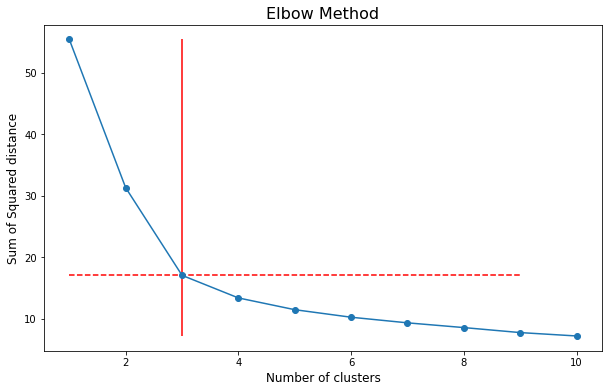

In [25]:
# ploting elbow method plot
plt.figure(figsize=(10,6))
plt.plot(num_clusers,ssd, marker = 'o')
plt.title('Elbow Method', fontsize = 16)
plt.xlabel('Number of clusters',fontsize=12)
plt.ylabel('Sum of Squared distance',fontsize=12)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")

plt.show()

For n_clusters=2, the silhouette score is 0.4724
For n_clusters=3, the silhouette score is 0.4838
For n_clusters=4, the silhouette score is 0.4604
For n_clusters=5, the silhouette score is 0.3548
For n_clusters=6, the silhouette score is 0.3437
For n_clusters=7, the silhouette score is 0.2902
For n_clusters=8, the silhouette score is 0.3168
For n_clusters=9, the silhouette score is 0.291
For n_clusters=10, the silhouette score is 0.3053


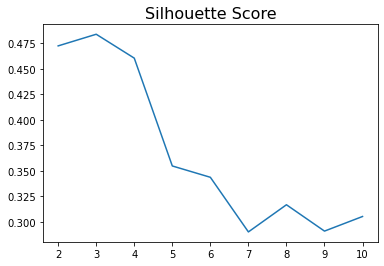

In [26]:
# silhouette analysis
num_clusters = list(range(2,11))
ss = []
for cluster in num_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters= cluster, max_iter=50)
    kmeans.fit(CNT_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = round(silhouette_score(CNT_scaled, cluster_labels),4)
    ss.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))


plt.plot(num_clusters,pd.DataFrame(ss)[0])
plt.title('Silhouette Score', fontsize = 16)
plt.show()

In [27]:
# K-Mean with k =3
kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state= 50)
kmeans.fit(CNT_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [28]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [29]:
#adding produced labels dataframe
CNT_country = CNT.copy()
CNT_country['KMean_clusterid']= pd.Series(kmeans.labels_)
CNT_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,0


In [30]:
# Checking the no of countries in each cluster
CNT_country.KMean_clusterid.value_counts()

0    93
2    46
1    28
Name: KMean_clusterid, dtype: int64

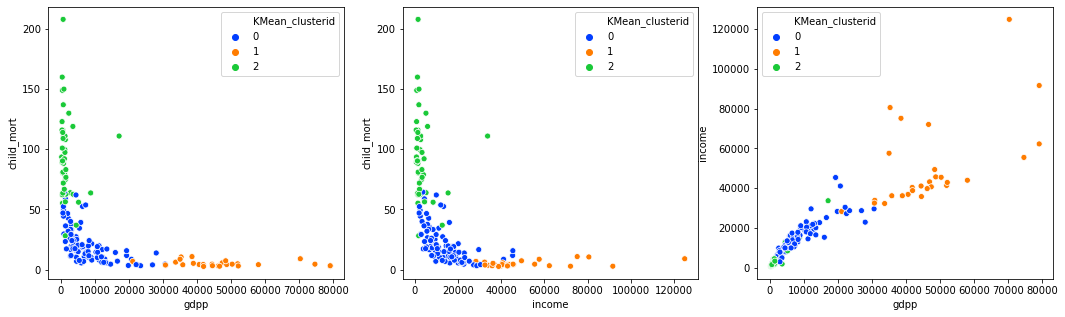

In [31]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='KMean_clusterid', data=CNT_country, palette="bright")

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='KMean_clusterid',data=CNT_country, palette="bright")

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='KMean_clusterid', data=CNT_country, palette="bright")

plt.show()

### Inference

    All three Clusters are visible 

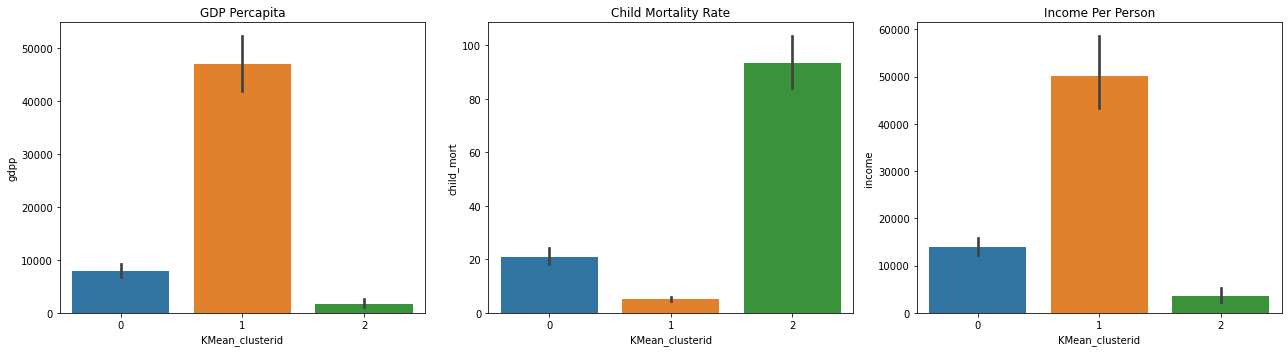

In [32]:
# visualising clusters
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'KMean_clusterid', y = 'gdpp', data=CNT_country)
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'KMean_clusterid', y = 'child_mort', data=CNT_country)
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'KMean_clusterid', y = 'income', data=CNT_country)
plt.title('Income Per Person')

plt.tight_layout()

plt.show()

### Inference 
    Two cluster having highest Child Mortality and lowest Income & GDPP and comes under undeveloped countries

## Clustering profiling using “gdpp, child_mort and income”

In [33]:
# Cheking the cluter means
CNT_country.groupby(['KMean_clusterid']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMean_clusterid,,,,,,,,,
2,93.284783,811.834109,94.207885,748.806761,3516.804348,12.097065,59.393478,5.069348,1695.913043
0,21.061290,3578.798694,548.175402,3687.127861,13939.677419,7.082688,73.078495,2.245806,7954.860215
1,5.046429,25775.329286,4312.093929,21552.342143,50178.571429,3.014679,80.514286,1.760714,46877.714286


In [34]:
#New dataframe for group by & analysis

CNT_country_analysis =  CNT_country.groupby(['KMean_clusterid']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
CNT_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMean_clusterid,,,,,,,,,
2,93.284783,811.834109,94.207885,748.806761,3516.804348,12.097065,59.393478,5.069348,1695.913043
0,21.061290,3578.798694,548.175402,3687.127861,13939.677419,7.082688,73.078495,2.245806,7954.860215
1,5.046429,25775.329286,4312.093929,21552.342143,50178.571429,3.014679,80.514286,1.760714,46877.714286


The mean of gdpp, child_mort and income shows that there is good inter cluster distance.

    Cluster 0 : Developing
    Cluster 1: Developed
    Cluste 2: Undeveloped
    
    We will focus on Cluster 2

In [35]:
# Creating a new field for count of observations in each cluster

CNT_country_analysis['Observations']=CNT_country[['KMean_clusterid','child_mort']].groupby(['KMean_clusterid']).count()
CNT_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Observations
KMean_clusterid,,,,,,,,,,
2,93.284783,811.834109,94.207885,748.806761,3516.804348,12.097065,59.393478,5.069348,1695.913043,46
0,21.061290,3578.798694,548.175402,3687.127861,13939.677419,7.082688,73.078495,2.245806,7954.860215,93
1,5.046429,25775.329286,4312.093929,21552.342143,50178.571429,3.014679,80.514286,1.760714,46877.714286,28


In [36]:
# Creating a new field for proportion of observations in each cluster

CNT_country_analysis['Proportion']=round(CNT_country_analysis['Observations']/CNT_country_analysis['Observations'].sum(),2)


#Summary View
CNT_country_analysis[['child_mort','income','gdpp','Observations','Proportion']]

,child_mort,income,gdpp,Observations,Proportion
KMean_clusterid,,,,,
2,93.284783,3516.804348,1695.913043,46,0.28
0,21.061290,13939.677419,7954.860215,93,0.56
1,5.046429,50178.571429,46877.714286,28,0.17


<Figure size 1080x720 with 0 Axes>

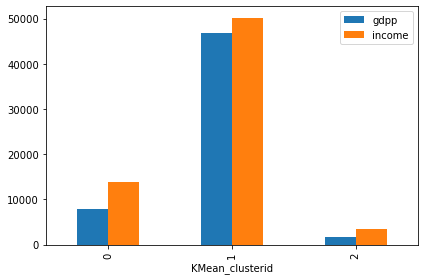

In [37]:
# Plot1 between income and gdpp against cluster_lables
plt.figure (figsize = (15,10))

CNT_country_plot1 = CNT_country[['KMean_clusterid', 'gdpp', 'income']].copy()
CNT_country_plot1 = CNT_country_plot1.groupby('KMean_clusterid').mean()
CNT_country_plot1.plot.bar()

plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

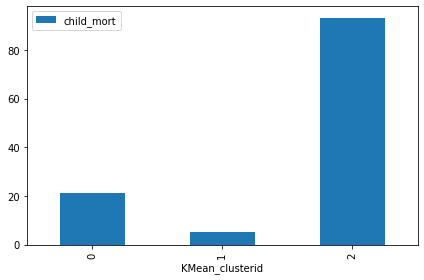

In [38]:
# Plot 2 between child_mort and cluster_labels

plt.figure (figsize = (15,10))

CNT_country_plot2 = CNT_country[['KMean_clusterid', 'child_mort']].copy()
CNT_country_plot2 = CNT_country_plot2.groupby('KMean_clusterid').mean()
CNT_country_plot2.plot.bar()

plt.tight_layout()
plt.show()

### Interpretation of Clusters:

    Cluster 2 has the Highest average Child Mortality rate of ~92 when compared to other clusters, and Lowest average GDPP & Income of ~ 1909 & 3897 respectively.

    All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 2 comprises of ~29% of overall data, and has ~48 observations in comparision to 167 total observations

In [39]:
# sort based on 'child_mort','income','gdpp' in respective order
K_cluster_Undeveloped = CNT_country[CNT_country['KMean_clusterid']== 2]
K_top5 = K_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)

print( 'Top 5 countries dire need of aid  based on K cluster are:' , K_top5['country'].values )

Top 5 countries dire need of aid  based on K cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


### Inference:
- Top 5 countries dire need of aid  based on K cluster are: 
    1. 'Burundi' 
    2. 'Liberia' 
    3. 'Congo, Dem. Rep.' 
    4. 'Niger' 
    5. 'Sierra Leone'

### Hierarchical Clustering

In [40]:
# new dataset check
CNT_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000837,0.003465,0.004473,0.008047,0.126144,0.475345,0.863216,0.004083
1,0.068160,0.017658,0.030375,0.035887,0.074933,0.080399,0.871795,0.092421,0.048937
2,0.120253,0.026416,0.020620,0.025280,0.098809,0.187691,0.875740,0.321627,0.053629
3,0.566699,0.033925,0.010454,0.027338,0.042535,0.245911,0.552268,0.926063,0.041835
4,0.037488,0.085656,0.086078,0.129764,0.148652,0.052213,0.881657,0.181146,0.151781


**Single Linkage**

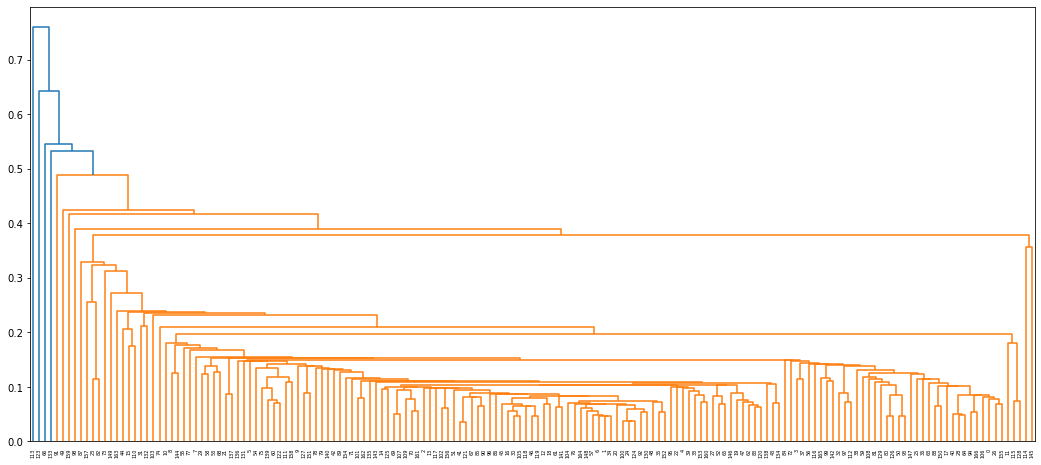

In [41]:
#  Utilise the single linkage method for clustering this dataset 
plt.figure(figsize = (18,8))
mergings = linkage(CNT_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Inference:

- The clusters of the single linkage are not truly satisfying. The single linkage method appears to be placing each outlier in its own cluster.

- As you can clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

**Complete Linkage**

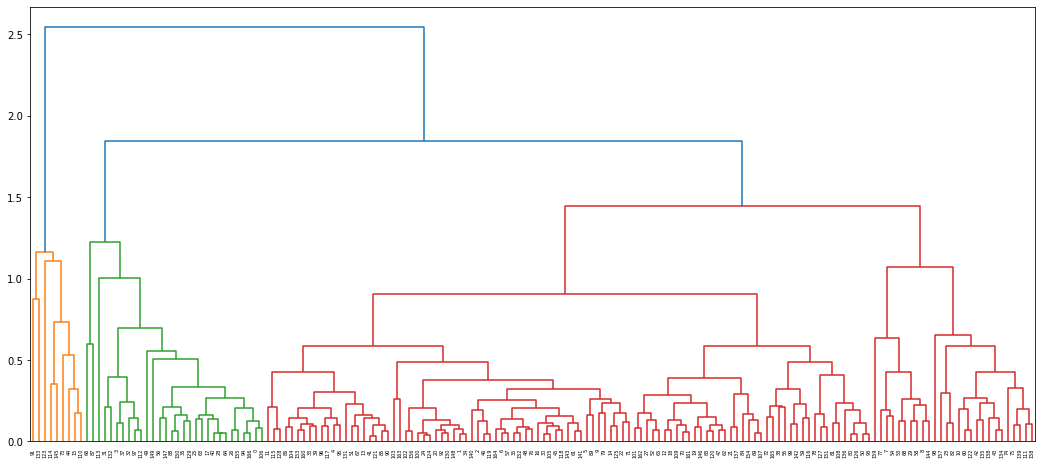

In [42]:
#  Utilise the complete linkage method for clustering this dataset.

plt.figure(figsize = (18,8))
mergings = linkage(CNT_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Inference:

- From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. 
- So we will use Complete linkage output for our further analysis.
- We will build two iterations of clustering with 3 & 4 clusters and analyse the output

In [43]:
# Creating the labels
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [44]:
# assign cluster labels

CNT_country['H_ClusterID'] = pd.Series(cluster_labels)
CNT_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,H_ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,0,1


In [45]:
# Cheking the new dataframe shape
CNT_country.shape

(167, 12)

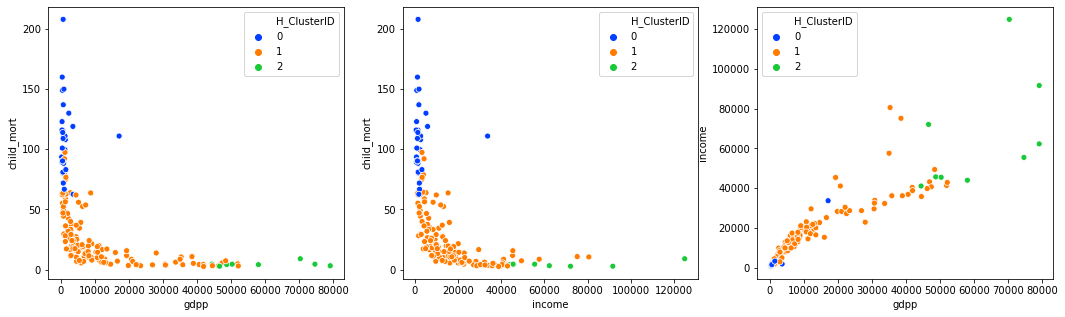

In [46]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='H_ClusterID', data=CNT_country, palette="bright")

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='H_ClusterID',data=CNT_country, palette="bright")

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='H_ClusterID', data=CNT_country, palette="bright")

plt.show()

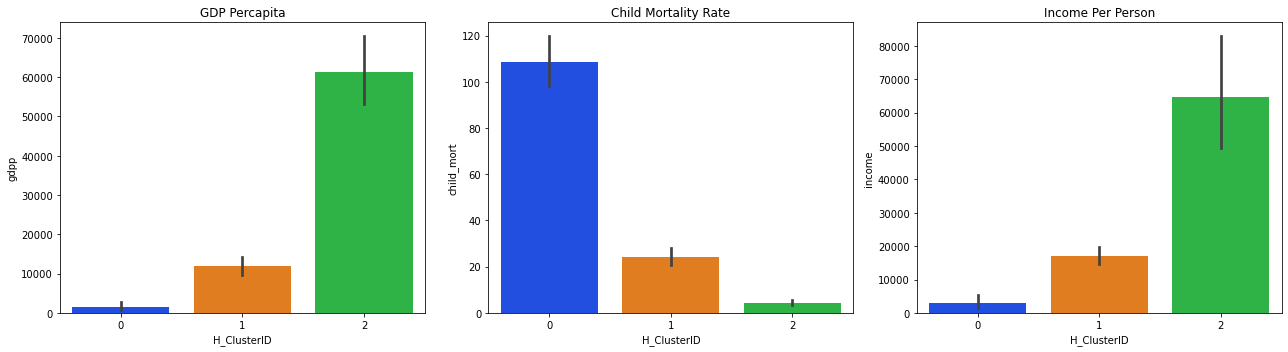

In [47]:
# visualising clusters
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'H_ClusterID', y = 'gdpp', data=CNT_country, palette="bright")
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'H_ClusterID', y = 'child_mort', data=CNT_country, palette="bright")
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'H_ClusterID', y = 'income', data=CNT_country, palette="bright")
plt.title('Income Per Person')

plt.tight_layout()

plt.show()

#### Inference
- Its clearly showing that the cluster 0 having highest Child Mortality and lowest Income & GDPP and its comes under undevloped countries

In [48]:
# Cheking the cluster count
CNT_country.H_ClusterID.value_counts()

1    128
0     30
2      9
Name: H_ClusterID, dtype: int64

In [49]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.
cluster_2 = CNT_country[CNT_country['H_ClusterID']==2]
cluster_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,H_ClusterID
15,Belgium,4.5,33921.60,4750.80,33166.80,41100,1.880,80.0,1.86,44400.0,1,2
44,Denmark,4.1,29290.00,6612.00,25288.00,44000,3.220,79.5,1.87,58000.0,1,2
73,Ireland,4.2,50161.00,4475.53,42125.50,45700,-3.220,80.4,2.05,48700.0,1,2
91,Luxembourg,2.8,64794.26,8158.50,55371.39,91700,3.620,81.3,1.63,79088.0,1,2
110,Netherlands,4.5,36216.00,5985.70,31990.80,45500,0.848,80.7,1.79,50300.0,1,2


In [50]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.
cluster_1 = CNT_country[CNT_country['H_ClusterID']== 1]
cluster_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,H_ClusterID
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460.0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200.0,0,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300.0,0,1
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220.0,0,1


#### Inference

- Clusters 2 & 1 seems to be Developed or Developing countries, so our segmentation is good in terms of all our under developed countries are segmented under cluster 0. 

### Clustering profiling using “gdpp, child_mort and income”

In [51]:
#New dataframe for group by & analysis
CNT_country_analysis = CNT_country.groupby(['H_ClusterID']).mean()
CNT_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid
H_ClusterID,,,,,,,,,,
0,108.683333,741.949407,82.031297,692.712767,2912.766667,12.226167,57.246667,5.467667,1471.566667,2.000000
1,24.148437,5187.880979,966.855283,4962.516555,17131.875000,7.134625,72.953906,2.433047,11993.492188,0.398438
2,4.400000,45063.846667,5537.121111,36092.231111,64766.666667,2.172111,80.811111,1.765556,61230.666667,1.000000


In [52]:
# Creating a new field for count of observations in each cluster
CNT_country_analysis['Observations'] = CNT_country[['H_ClusterID', 'child_mort']].groupby(['H_ClusterID']).count()
CNT_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,Observations
H_ClusterID,,,,,,,,,,,
0,108.683333,741.949407,82.031297,692.712767,2912.766667,12.226167,57.246667,5.467667,1471.566667,2.000000,30
1,24.148437,5187.880979,966.855283,4962.516555,17131.875000,7.134625,72.953906,2.433047,11993.492188,0.398438,128
2,4.400000,45063.846667,5537.121111,36092.231111,64766.666667,2.172111,80.811111,1.765556,61230.666667,1.000000,9


In [53]:
# Creating a new field for proportion of observations in each cluster
CNT_country_analysis['Proportion'] = round(CNT_country_analysis ['Observations'] / (CNT_country_analysis ['Observations'].sum()),2)
CNT_country_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,Observations,Proportion
H_ClusterID,,,,,,,,,,,,
0,108.683333,741.949407,82.031297,692.712767,2912.766667,12.226167,57.246667,5.467667,1471.566667,2.000000,30,0.18
1,24.148437,5187.880979,966.855283,4962.516555,17131.875000,7.134625,72.953906,2.433047,11993.492188,0.398438,128,0.77
2,4.400000,45063.846667,5537.121111,36092.231111,64766.666667,2.172111,80.811111,1.765556,61230.666667,1.000000,9,0.05


#### Inference:

From  the mean of clusters we could see that,
> - cluster 0 : Undeveloped
> - Cluster 1: Developing
> - Cluste 2 : Developed

We are intrested on cluster 0 as objective is to find top 10 undevelped countries

<Figure size 1080x720 with 0 Axes>

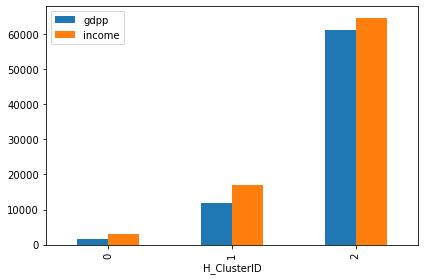

In [54]:
# Plot1 between income and gdpp against cluster_lables
plt.figure (figsize = (15,10))

CNT_country_plot1 = CNT_country[['H_ClusterID', 'gdpp', 'income']].copy()
CNT_country_plot1 = CNT_country_plot1.groupby('H_ClusterID').mean()
CNT_country_plot1.plot.bar()

plt.tight_layout()
plt.show()

<Figure size 1080x720 with 0 Axes>

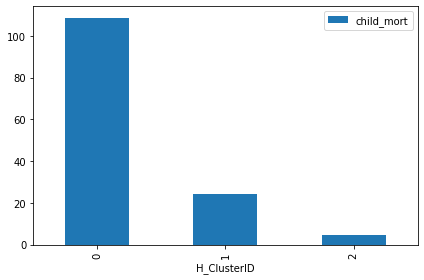

In [55]:
# Plot 2 between child_mort and cluster_labels

plt.figure (figsize = (15,10))

CNT_country_plot2 = CNT_country[['H_ClusterID', 'child_mort']].copy()
CNT_country_plot2 = CNT_country_plot2.groupby('H_ClusterID').mean()
CNT_country_plot2.plot.bar()

plt.tight_layout()
plt.show()

In [56]:
# sort based on 'child_mort','income','gdpp' in respective order
H_cluster_Undeveloped = CNT_country[CNT_country['H_ClusterID']== 0]
H_top5 = H_cluster_Undeveloped.sort_values(by = ['gdpp','income','child_mort'],
                                                     ascending=[True, True, False]).head(5)

print( 'Top 5 countries dire need of aid  based on H cluster are:' , H_top5['country'].values )

Top 5 countries dire need of aid  based on H cluster are: ['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


From Hierarchical Clusturing we could get top 5 undeveloped countries are:

1. 'Burundi' 
2. 'Liberia' 
3. 'Congo, Dem. Rep.'
4. 'Niger' 
5. 'Sierra Leone'

## Clustering Model Selection

In [57]:
# Get the % of cluster distribution
H_cluster_per = CNT_country.H_ClusterID.value_counts(normalize = True)*100
print('Hierarchical Clustering Countries %:')
print(CNT_country.H_ClusterID.value_counts(normalize = True)*100)

K_cluster_per = CNT_country.KMean_clusterid.value_counts(normalize = True)*100
print('\nKMean Clustering Countries %:')
print(CNT_country.KMean_clusterid.value_counts(normalize = True)*100)

Hierarchical Clustering Countries %:
1    76.646707
0    17.964072
2     5.389222
Name: H_ClusterID, dtype: float64

KMean Clustering Countries %:
0    55.688623
2    27.544910
1    16.766467
Name: KMean_clusterid, dtype: float64


### Inference:
- The above data shows KMean is better cluseted in the term of distribution of countries. 
- So we will be creating the final cluser with KMean cluster and doing profiling considering the labels accordingly.

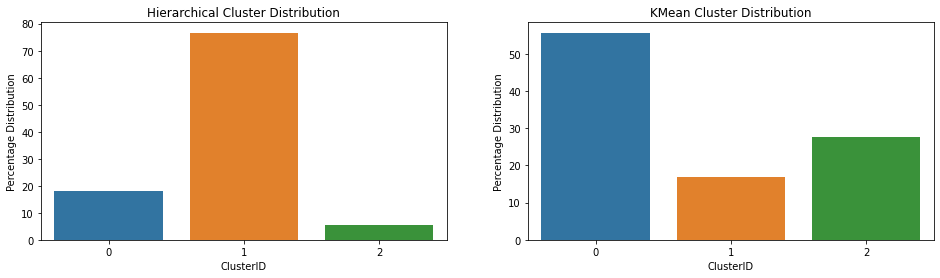

In [58]:
# barplot for cluster distribution
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.barplot(x= H_cluster_per.index, y = H_cluster_per)
plt.title('Hierarchical Cluster Distribution')
plt.xlabel('ClusterID')
plt.ylabel('Percentage Distribution')

plt.subplot(1,2,2)
sns.barplot(x= K_cluster_per.index, y = K_cluster_per)
plt.title('KMean Cluster Distribution')
plt.xlabel('ClusterID')
plt.ylabel('Percentage Distribution')
plt.show()

**Cluster Summary**

- From above analysis we could see KMean is having better distributed cluster. So we will select final model as KMean cluster and doing profiling considering the labels accordingly.
- Kindly note that both the model has resulted the same coutries as top 5 undeveloped county.
- By comparing averages of K-means we can conclude that
    - Cluster 1 belongs to `Undeveloped` Countries,
    - Cluster 2 belongs to `Developed` Countries
    - Cluster 0 belongs to `Developing` Countries.

To differentiate the clusters of developed countries from the clusters of under-developed countries, the notation can be changes and labeled as, {0: developed, 1:developing, 2: Undeveloped}

In [59]:
# Final labels
CNT_country['ClusterLabels'] = CNT_country['KMean_clusterid'].map({0: 'Developed', 1:'Developing', 2: 'Undeveloped'})
CNT_country.head()  

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMean_clusterid,H_ClusterID,ClusterLabels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553.0,2,0,Undeveloped
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090.0,0,1,Developed
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460.0,0,1,Developed
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530.0,2,0,Undeveloped
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200.0,0,1,Developed


In [60]:
# select final data frame for profiling
K_cluster = CNT_country[['country','gdpp','child_mort','income','ClusterLabels']]
K_cluster.head()

,country,gdpp,child_mort,income,ClusterLabels
0,Afghanistan,553.0,90.2,1610,Undeveloped
1,Albania,4090.0,16.6,9930,Developed
2,Algeria,4460.0,27.3,12900,Developed
3,Angola,3530.0,119.0,5900,Undeveloped
4,Antigua and Barbuda,12200.0,10.3,19100,Developed


**Final Cluster:** 
- Based on the above interpretation of the cluster, we now rename all the clusters accordingly. 
- The Cluster 2 now becomes 'Undeveloped Countries', which will be of our interest.
- We will further analyse the Cluster 'Undeveloped Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

### Analysing the 'Under Developed Countries (UDC)' Cluster

In [61]:
# Subset data frame based on undeveloped countries
K_cluster_UDC = K_cluster[K_cluster['ClusterLabels'] == 'Undeveloped']
K_cluster_UDC.head()

,country,gdpp,child_mort,income,ClusterLabels
0,Afghanistan,553.0,90.2,1610,Undeveloped
3,Angola,3530.0,119.0,5900,Undeveloped
17,Benin,758.0,111.0,1820,Undeveloped
25,Burkina Faso,575.0,116.0,1430,Undeveloped
26,Burundi,231.0,93.6,764,Undeveloped


We wiil prioritize soft the features on the order of gdpp, income and child_mort with below understanding,
 - `gdpp` and `income` are highly `+ve` correlated.
 - `gdpp` and `income` both have `-ve` correlation with `child_mort`.
 - Finalcial aid will directly improve `gdpp` and `income` and thus child_mort can be reduced.

In [62]:
# sort based on 'child_mort','income','gdpp' in respective order
K_top5=K_cluster_UDC.sort_values(by = ['gdpp','income', 'child_mort']).head(5).copy()

K_top5 = K_top5[['country','gdpp','income', 'child_mort']]
#Final country list
K_top5

,country,gdpp,income,child_mort
26,Burundi,231.0,764,93.6
88,Liberia,327.0,700,89.3
37,"Congo, Dem. Rep.",334.0,609,116.0
112,Niger,348.0,814,123.0
132,Sierra Leone,399.0,1220,160.0


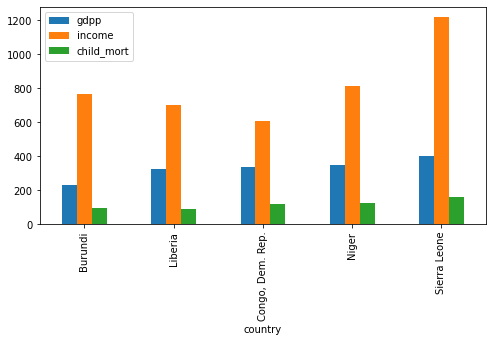

In [63]:
# plot for final top5 countries based on child_mort, gdpp and income

KMean_plot = K_top5.set_index('country')
KMean_plot.plot.bar(figsize = (8,4))

plt.show()

## Final Conclusion

- Performed CLUSTERING on the socio-economic data provided for various countries to identify countries to recommend for Financial Aid from the NGO. 
- Based on our Clustering Analysis, I have identified the top countries under our 'Undeveloped Countries' cluster which are in dire need of the Financial Aid. This output is purely based on the dataset we used and various analytical methodology we performed.

**Finanical Aid required countries on priority bases:**
<font color = 'Brown'> 
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone 
<font>